<a href="https://colab.research.google.com/github/dewayneh57/ACS5513/blob/main/ACS_5513_Petabyte_Pirates_Project_Deliverable_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ames Housing - Project Deliverable 2
**ACS-5513 - Applied Machine Learning**

**Dr. Neelam Dwivedi**

**Petabyte Pirates (Team A)**

**Source:** https://github.com/dewayneh57/ACS5513/blob/main/ACS-5113_Petabyte_Pirates_Deliverable_1.csv


## Initial Imports and Data Sourcing

In [ ]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# options
pd.set_option("display.max_columns", None)

file_path_url = 'https://raw.githubusercontent.com/dewayneh57/ACS5513/main/ACS-5113_Petabyte_Pirates_Deliverable_1.csv'

# Load the latest version
df = pd.read_csv(file_path_url)

print(df.shape)
df.head(20)

(2789, 91)


,MS SubClass,Overall Qual,Year Built,Year Remod/Add,BsmtFin Type 1,Total Bsmt SF,1st Flr SF,Gr Liv Area,Full Bath,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,SalePrice,SaleDate,House Age,Remodel Age,Age Bucket,Total SF,Total SF Plus Garage,Total Baths,Price per SF,Qual x SF,Season Sold,Exter Qual_Ord,Bsmt Qual_Ord,Heating QC_Ord,Kitchen Qual_Ord,Fireplace Qu_Ord,Functional_Ord,Neighborhood__BrkSide,Neighborhood__ClearCr,Neighborhood__CollgCr,Neighborhood__Crawfor,Neighborhood__Edwards,Neighborhood__Gilbert,Neighborhood__IDOTRR,Neighborhood__MeadowV,Neighborhood__NAmes,Neighborhood__NWAmes,Neighborhood__NoRidge,Neighborhood__NridgHt,Neighborhood__OldTown,Neighborhood__Other,Neighborhood__SWISU,Neighborhood__Sawyer,Neighborhood__SawyerW,Neighborhood__Somerst,Neighborhood__Timber,House Style__2Story,House Style__SFoyer,Bldg Type__2fmCon,Bldg Type__Duplex,Bldg Type__Twnhs,Bldg Type__TwnhsE,Sale Condition__Other,Sale Condition__Partial,Sale Type__New,Sale Type__Other,Sale Type__WD,Garage Type__BuiltIn,Garage Type__Detchd,Garage Type__Other,Foundation__CBlock,Foundation__PConc,Foundation__Slab,Exterior 1st__CemntBd,Exterior 1st__HdBoard,Exterior 1st__MetalSd,Exterior 1st__Stucco,Exterior 1st__VinylSd,Exterior 1st__Wd Sdng,Exterior 1st__WdShing,Exterior 2nd__CmentBd,Exterior 2nd__HdBoard,Exterior 2nd__MetalSd,Exterior 2nd__Stucco,Exterior 2nd__VinylSd,Exterior 2nd__Wd Sdng,Exterior 2nd__Wd Shng,Roof Style__Hip,MS Zoning__Other,MS Zoning__RL,MS Zoning__RM,Lot Shape__IR2,Lot Shape__Reg,Lot Config__CulDSac,Lot Config__Inside,Condition 1__Feedr,Condition 1__Norm,Condition 1__PosN
0,20,6,1960,1960,BLQ,1080.0,1656,1656,1,1960.0,Fin,2.0,528.0,215000,2010-05-01,50,50,30-60,2736.0,3264.0,1.0,78.581871,16416.0,Spring,3,3.0,2,3,4.0,8,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False
1,20,5,1961,1961,Rec,882.0,896,896,1,1961.0,Unf,1.0,730.0,105000,2010-06-01,49,49,30-60,1778.0,2508.0,1.0,59.055118,8890.0,Summer,3,3.0,3,3,0.0,8,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,True,True,False,False
2,20,6,1958,1958,ALQ,1329.0,1329,1329,1,1958.0,Unf,1.0,312.0,172000,2010-06-01,52,52,30-60,2658.0,2970.0,1.5,64.710309,15948.0,Summer,3,3.0,3,4,0.0,8,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,True,False,False,False,False,False,False,True,False
3,20,7,1968,1968,ALQ,2110.0,2110,2110,2,1968.0,Fin,2.0,522.0,244000,2010-04-01,42,42,30-60,4220.0,4742.0,2.5,57.819905,29540.0,Spring,4,3.0,5,5,3.0,8,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,True,False,False,False,True,False
4,60,5,1997,1998,GLQ,928.0,928,1629,2,1997.0,Fin,2.0,482.0,189900,2010-03-01,13,12,11-30,2557.0,3039.0,2.5,74.266719,12785.0,Spring,3,4.0,4,3,3.0,8,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,

## Final Data Processing, Feature Engineering, and Preparation for ML Training

**Note**: while the vast majority of feature engineering was completed in Deliverable 1, there were a few outstanding changes to transform text data into numerical features. Subsequent engineering was performed to evaluate the impact of these additional features.

In result, garage finish when combined with other garage features was of high value.

In [ ]:
# encode garage finish with an ordinal map, missed from deliverable 1, and check
# pearson corelation coefficient.
# Fin    Finished (3)
# RFn    Rough Finished (2)
# Unf    Unfinished (1)
# NA    No Garage (0)

ordinal_map = {
      'Fin': 3,
      'RFn': 2,
      'Unf': 1,
      'NA': 0
  }

df['Garage Finish_Ord'] = df['Garage Finish'].map(ordinal_map).fillna(0)

correlation_garage_finish_ord = df['Garage Finish_Ord'].corr(df['SalePrice'])

print("Correlation with 'Garage Finish: ", correlation_garage_finish_ord)

# 0.56 pearson coefficient warrants evaluating multiplicatives with other
# features, such as:
#    - Garage Finish_Ord x Garage Area
#    - Garage Finish_Ord x Garage Cars
#    - Garage Finish_Ord x Garage Area x Garage Cars
# Then, with the one-hot encoded features:
#    - Garage Type__BuiltIn
#    - Garage Type__Detchd
#    - Garage Type__Other

df['Garage Finish x Garage Area'] = df['Garage Finish_Ord'] * df['Garage Area']
df['Garage Finish x Garage Cars'] = df['Garage Finish_Ord'] * df['Garage Cars']
df['Garage Finish x Garage Area x Garage Cars'] = df['Garage Finish_Ord'] * df['Garage Area'] * df['Garage Cars']

correlation_garage_finish_ord_x_garage_area = df['Garage Finish x Garage Area'].corr(df['SalePrice'])
correlation_garage_finish_ord_x_garage_cars = df['Garage Finish x Garage Cars'].corr(df['SalePrice'])
correlation_garage_finish_ord_x_garage_area_x_garage_cars = df['Garage Finish x Garage Area x Garage Cars'].corr(df['SalePrice'])

print("Correlation with 'Garage Finish x Garage Area: ", correlation_garage_finish_ord_x_garage_area)
print("Correlation with 'Garage Finish x Garage Cars: ", correlation_garage_finish_ord_x_garage_cars)
print("Correlation with 'Garage Finish x Garage Area x Garage Cars: ", correlation_garage_finish_ord_x_garage_area_x_garage_cars)

df['Garage Cars x Garage Area'] = df['Garage Cars'] * df['Garage Area']

correlation_garage_cars_x_garage_area = df['Garage Cars x Garage Area'].corr(df['SalePrice'])

print("Correlation with 'Garage Cars x Garage Area: ", correlation_garage_cars_x_garage_area)

Correlation with 'Garage Finish:  0.5620386730761091
Correlation with 'Garage Finish x Garage Area:  0.7084213901110302
Correlation with 'Garage Finish x Garage Cars:  0.6962947413059278
Correlation with 'Garage Finish x Garage Area x Garage Cars:  0.7034148202078925
Correlation with 'Garage Cars x Garage Area:  0.6259395066708922


In [ ]:
# Also check Overall Qual x Total SF Plus Garage Correlation with SalePrice

df['Qual x SF Plus Garage'] = df['Overall Qual'] * df['Total SF Plus Garage']
df['Qual x SF Plus Garage + Garage Finish x Garage Area'] = df['Qual x SF Plus Garage'] + df['Garage Finish x Garage Area']

correlation_qual_x_sf = df['Qual x SF Plus Garage'].corr(df['SalePrice'])
correlation_qual_x_sf_garage_finish_garage_area = df['Qual x SF Plus Garage + Garage Finish x Garage Area'].corr(df['SalePrice'])

print("Correlation with 'Overall Qual x Total SF Plus Garage: ", correlation_qual_x_sf)
print("Correlation with 'Overall Qual x Total SF Plus Garage + Garage Finish x Garage Area: ", correlation_qual_x_sf_garage_finish_garage_area)


Correlation with 'Overall Qual x Total SF Plus Garage:  0.9021644325691964
Correlation with 'Overall Qual x Total SF Plus Garage + Garage Finish x Garage Area:  0.906104417327094


In [ ]:
#  Clean up remaining categorical / date columns
#  and rebuild numeric model matrix
#  Columns we still need to handle:
#     BsmtFin Type 1  (nominal)
#     Garage Finish   (drop – already ordinal-encoded)
#     SaleDate        (YYYY-MM-DD)
#     Age Bucket      (ordinal buckets)
#     Season Sold     (nominal)
# ============================================================

# Drop Garage Finish (string) – we have Garage Finish_Ord
if 'Garage Finish' in df.columns:
    df.drop(columns=['Garage Finish'], inplace=True)

# Parse SaleDate and create Year / Month / Quarter numeric cols
df['SaleDate'] = pd.to_datetime(df['SaleDate'], errors='coerce')

df['SaleYear']    = df['SaleDate'].dt.year
df['SaleMonth']   = df['SaleDate'].dt.month
df['SaleQuarter'] = df['SaleDate'].dt.quarter

# Drop SaleDate
df.drop(columns=['SaleDate'], inplace=True)

# Map Age Bucket to ordered integers
age_map = {'≤10': 4, '11-30': 3, '30-60': 2, '60+': 1}
df['Age Bucket_Ord'] = df['Age Bucket'].map(age_map)
df.drop(columns=['Age Bucket'], inplace=True)

# One-hot encode BsmtFin Type 1 and Season Sold
ohe_cols = ['BsmtFin Type 1', 'Season Sold']
df = pd.get_dummies(df, columns=ohe_cols, drop_first=False, prefix_sep='__')

# Convert any lingering booleans to 0/1 ints
bool_cols = df.select_dtypes(include=['bool']).columns
df[bool_cols] = df[bool_cols].astype(int)

# At this point every column should be numeric
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2789 entries, 0 to 2788
Columns: 107 entries, MS SubClass to Season Sold__Winter
dtypes: float64(18), int32(3), int64(86)
memory usage: 2.2 MB
None


In [ ]:
# check all correlation with numeric features again
numeric_cols = df.select_dtypes(include=np.number).columns
corr_matrix = df[numeric_cols].corr()
corr_matrix['SalePrice'].sort_values(ascending=False).head(30)

,SalePrice
SalePrice,1.000000
Qual x SF Plus Garage + Garage Finish x Garage Area,0.906104
Qual x SF Plus Garage,0.902164
Qual x SF,0.891293
Total SF Plus Garage,0.819095
Overall Qual,0.789428
Total SF,0.783892
Garage Finish x Garage Area,0.708421
Garage Finish x Garage Area x Garage Cars,0.703415
Garage Finish x Garage Cars,0.696295


## ML Model Training and Evaluation


In this section, the team began trials, beginning with an evaluation of RandomForestRegressor. This gave us an early signal of feature importance with all 107 features.

### RandomForestRegressor

In [ ]:
#  RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Modelling dataframe
df_model = df.copy()

# Drop Price per Square Feet from df_model
df_model.drop(columns=['Price per SF'], inplace=True)

X = df_model.drop('SalePrice', axis=1)
y = df_model['SalePrice']

# Train / test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# Run the RandomForestRegressor model
rf = RandomForestRegressor(
    n_estimators=400,
    max_depth=20,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, rf.predict(X_test)))
r2   = r2_score(y_test, rf.predict(X_test))

print(f"Test RMSE : {rmse:,.0f}")
print(f"Test R²   : {r2:.3f}")

# Feature importances
imp = (
    pd.Series(rf.feature_importances_, index=X.columns)
      .sort_values(ascending=False)
)
print("\nTop-30 feature importances:")
display(imp.head(30))

# Export all feature importances to csv
imp.to_csv('feature_importances.csv')

Test RMSE : 20,794
Test R²   : 0.887

Top-30 feature importances:


,0
Qual x SF Plus Garage + Garage Finish x Garage Area,0.746573
Qual x SF Plus Garage,0.074909
Qual x SF,0.012161
Remodel Age,0.011703
Gr Liv Area,0.010217
Year Remod/Add,0.009475
Total Bsmt SF,0.008377
Total SF Plus Garage,0.008273
Garage Yr Blt,0.006891
House Age,0.006252


### Final Data Frame for Model

The team was able to reduce the model size by 75%, from 107 features to 29, while keeping a low error margin.

In [ ]:
# Finalize the feature set and run RandomForestRegressor once more

df_model = df[[
  'Qual x SF Plus Garage + Garage Finish x Garage Area',
  'Qual x SF Plus Garage',
  'Qual x SF',
  'Remodel Age',
  'Gr Liv Area',
  'Year Remod/Add',
  'Total Bsmt SF',
  'Total SF Plus Garage',
  'Garage Yr Blt',
  'House Age',
  'Total SF',
  '1st Flr SF',
  'Fireplace Qu_Ord',
  'Year Built',
  'Kitchen Qual_Ord',
  'Garage Finish x Garage Area',
  'Garage Finish x Garage Area x Garage Cars',
  'Garage Cars x Garage Area',
  'Bsmt Qual_Ord',
  'Garage Area',
  'Heating QC_Ord',
  'Total Baths',
  'Overall Qual',
  'Full Bath',
  'Garage Finish x Garage Cars',
  'Exter Qual_Ord',
  'Garage Finish_Ord',
  'House Style__2Story',
  'Garage Cars',
  'SalePrice'
]].copy().dropna()

X = df_model.drop('SalePrice', axis=1)
y = df_model['SalePrice']

# Train / test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# Run the RandomForestRegressor model
rf = RandomForestRegressor(
    n_estimators=400,
    max_depth=20,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, rf.predict(X_test)))
r2   = r2_score(y_test, rf.predict(X_test))

print(f"Test RMSE : {rmse:,.0f}")
print(f"Test R²   : {r2:.3f}")

# Feature importances
imp = (
    pd.Series(rf.feature_importances_, index=X.columns)
      .sort_values(ascending=False)
)
print("\nTop-30 feature importances:")
display(imp.head(30))


Test RMSE : 20,651
Test R²   : 0.866

Top-30 feature importances:


,0
Qual x SF Plus Garage + Garage Finish x Garage Area,0.756185
Qual x SF Plus Garage,0.053280
Qual x SF,0.027658
Remodel Age,0.016940
Gr Liv Area,0.015638
Total Bsmt SF,0.013212
Year Remod/Add,0.011873
Total SF Plus Garage,0.010398
1st Flr SF,0.010283
Fireplace Qu_Ord,0.008816


### Hyper-Parameter Tuning

The team used the RandomForestRegressor with GridSearchCV to understand the best parameters for `max_depth`, `min_samples_leaf`, and `n_estimators`.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 400],
    'max_depth': [None, 10, 20],
    'min_samples_leaf': [1, 3, 5]
}

rf_base = RandomForestRegressor(random_state=42, n_jobs=-1)

grid_search = GridSearchCV(
    estimator=rf_base,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X, y)

# Best params and score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validated RMSE: {-grid_search.best_score_:,.0f}")

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'n_estimators': 400}
Best Cross-Validated RMSE: 20,821


### k-Fold Cross Validation


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_squared_error


# Define 5-fold CV and custom RMSE scorer
kf = KFold(n_splits=5, shuffle=True, random_state=42)

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(rmse, greater_is_better=False)

rf = RandomForestRegressor(
    n_estimators=400,
    max_depth=20,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1
)

# Run CV and report results
rmse_scores = -cross_val_score(rf, X, y, cv=kf, scoring=rmse_scorer)
r2_scores   =  cross_val_score(rf, X, y, cv=kf, scoring='r2')

print(f"Cross-validated RMSE : {rmse_scores.mean():,.0f}  ± {rmse_scores.std():,.0f}")
print(f"Cross-validated R²   : {r2_scores.mean():.3f}  ± {r2_scores.std():.3f}")

# Show per-fold scores
cv_df = pd.DataFrame({
    'Fold': range(1, 6),
    'RMSE': rmse_scores.round(0),
    'R²'  : r2_scores.round(3)
})
display(cv_df)

Cross-validated RMSE : 21,671  ± 834
Cross-validated R²   : 0.859  ± 0.013


,Fold,RMSE,R²
0,1,20721.0,0.865
1,2,21568.0,0.846
2,3,21856.0,0.877
3,4,21070.0,0.865
4,5,23142.0,0.843


### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Create a pipeline that first imputes and then fits the Linear Regression model
lr_pipeline = Pipeline([
    ('imputer', imputer),
    ('linear_regression', LinearRegression())
])

lr_pipeline.fit(X_train, y_train)

y_pred = lr_pipeline.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Linear Reg RMSE: {rmse:,.0f}, R²: {r2:.3f}")

Linear Reg RMSE: 21,017, R²: 0.861


In [ ]:
### Ridge

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Create a pipeline that first imputes and then fits the Ridge model
ridge_pipeline = Pipeline([
    ('imputer', imputer),
    ('ridge', Ridge(alpha=10))
])

ridge_pipeline.fit(X_train, y_train)

y_pred = ridge_pipeline.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Ridge RMSE: {rmse:,.0f}, R²: {r2:.3f}")

Ridge RMSE: 21,099, R²: 0.860


### Final Model Output and Comparison

The team folded all shortlisted models, including ensembles and stacking models, into one cell, that looped through the train, test, evaluation, and model file (pickle-based) creation.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,Model,RMSE,R²
0,Stacking,20037.166967,0.873430
1,CatBoost,20300.067651,0.870087
2,XGBoost,20403.685942,0.868757
3,LightGBM,20710.728686,0.864778
4,Random Forest,20895.434830,0.862355
5,HistGBR,20927.350608,0.861934
6,Elastic-NetCV,20990.391686,0.861101
7,Linear Regression,21075.715252,0.859969
8,Ridge,21099.358122,0.859655


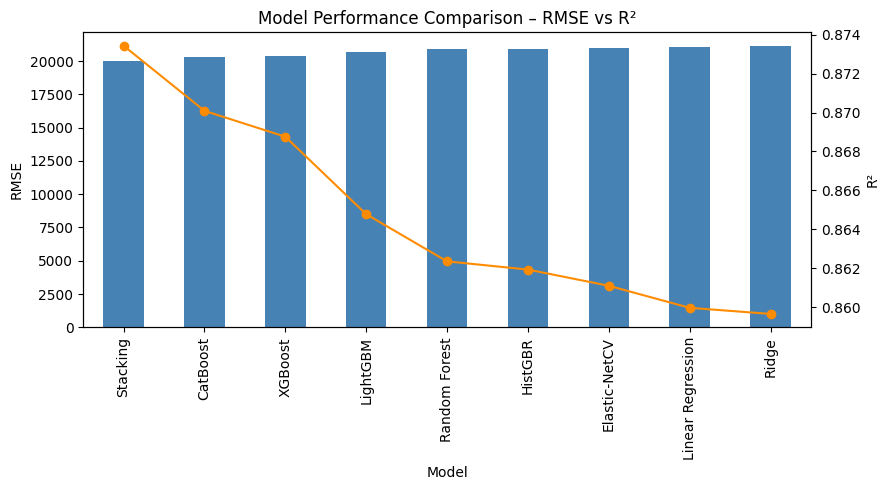

In [ ]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import (
    LinearRegression, Ridge, ElasticNetCV
)
from sklearn.ensemble import (
    RandomForestRegressor, HistGradientBoostingRegressor, StackingRegressor
)
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
!pip install catboost -q
from catboost import CatBoostRegressor
from joblib import dump
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", message="No further splits")
warnings.filterwarnings("ignore", message="\[LightGBM\]")
warnings.filterwarnings("ignore", message="FutureWarning")

# Train / test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# Reusable imputer
imputer = SimpleImputer(strategy='mean')

# Defining the candidate models (raw)
models_raw = {
    "Random Forest": RandomForestRegressor(
        n_estimators=400, random_state=42, n_jobs=-1
    ),

    "XGBoost": XGBRegressor(
        n_estimators=400, learning_rate=0.05, max_depth=4,
        subsample=0.8, colsample_bytree=0.8, random_state=42, n_jobs=-1
    ),

    "LightGBM": LGBMRegressor(
        n_estimators=400, learning_rate=0.05, max_depth=4,
        subsample=0.8, colsample_bytree=0.8, random_state=42,
        verbosity=-1 # lots of spam to be silenced
    ),

    # Elastic-Net w/ scaling to ensure convergence
    "Elastic-NetCV": Pipeline([
        ('imputer', imputer),
        ('scaler',  StandardScaler()),
        ('enet',    ElasticNetCV(
            alphas=np.logspace(-3, 2, 50),
            l1_ratio=[.1, .5, .9],
            cv=5,
            max_iter=50000,
            tol=1e-3
        ))
    ]),

    "HistGBR": HistGradientBoostingRegressor(
        max_depth=None, learning_rate=0.05,
        max_iter=400, random_state=42
    ),

    "CatBoost": CatBoostRegressor(
        iterations=400, learning_rate=0.05,
        depth=6,loss_function='RMSE', verbose=False, random_state=42),

    "Linear Regression": LinearRegression(),

    "Ridge": Ridge(alpha=10)
}

# Wrapping the remaining models with imputer
models = {}
for name, model in models_raw.items():
    if isinstance(model, Pipeline):     # Elastic-Net already wrapped
        models[name] = model
    else:
        models[name] = Pipeline([
            ('imputer', imputer),
            (name.lower().replace(' ', '_'), model)
        ])

# Defining the stacking ensemble
stack_base = [
    ('rf',  models["Random Forest"]),
    ('xgb', models["XGBoost"]),
    ('enet', models["Elastic-NetCV"])
]

stacker = StackingRegressor(
    estimators=stack_base,
    final_estimator=Pipeline([
        ('imputer', imputer),
        ('enet_final', ElasticNetCV(cv=5, max_iter=50000))
    ]),
    passthrough=True,
    n_jobs=-1
)
models["Stacking"] = stacker

# Fit, evaluate, and export the models for our tool
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2   = r2_score(y_test, y_pred)
    results.append([name, rmse, r2])

    # Save model
    dump(model, f"{name}.pkl")

results_df = (pd.DataFrame(results, columns=["Model", "RMSE", "R²"])
              .sort_values("RMSE")
              .reset_index(drop=True))
display(results_df)

# Plot on a chart
fig, ax1 = plt.subplots(figsize=(9,5))
results_df.plot(kind='bar', x='Model', y='RMSE',
                ax=ax1, color='steelblue', legend=False)
ax1.set_ylabel("RMSE")

ax2 = ax1.twinx()
results_df.plot(kind='line', x='Model', y='R²',
                ax=ax2, color='darkorange', marker='o', legend=False)
ax2.set_ylabel("R²")

ax1.set_title("Model Performance Comparison – RMSE vs R²")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()